## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [0]:
import os
import keras
import itertools

#!nvidia-smi
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.layers import BatchNormalization,Dense,Activation

def build_mlp(input_shape, output_units=10, num_neurons=[128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [0]:
"""Code Here
設定超參數
"""

BATCH_SIZE=[2,16,32,128,256]
EPOCHS=50
LEARNING_RATE=1e-2
MOMENTUM=0.95

####  試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bn in BATCH_SIZE:
    keras.backend.clear_session()
    model=build_mlp(x_train.shape[1:])
    opt=keras.optimizers.SGD(lr=LEARNING_RATE,momentum=MOMENTUM,nesterov=True)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
    
    
    model.fit(x_train,y_train,batch_size=bn,epochs=EPOCHS,
             validation_data=(x_test,y_test),shuffle=True)
    
    
    exp_name='exp-batch-size-%s' % str(bn)
    results[exp_name]=model.history.history

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 104s 2ms/step - loss: 2.3190 - accuracy: 0.1421 - val_loss: 2.2463 - val_accuracy: 0.1678
Epoch 2/50
50000/50000 [==============================] - 104s 2ms/step - loss: 2.2502 - accuracy: 0.1635 - val_loss: 2.3323 - val_accuracy: 0.2090
Epoch 3/50
50000/50000 [==============================] - 106s 2ms/step - loss: 2.2359 - accuracy: 0.1662 - val_loss: 2.6117 - val_accuracy: 0.2027
Epoch 4/50
50000/50000 [==============================] - 104s 2ms/step - loss: 2.2351 - accuracy: 0.1638 - val_loss: 3.1359 - val_accuracy: 0.2012
Epoch 5/50
50000/50000 [==============================] - 102s 2ms/step - loss: 2.2333 - accuracy: 0.1642 - val_loss: 5.0326 - val_accuracy: 0.1854
Epoch 6/50
50000/50000 [==============================] - 106s 2ms/step - loss: 2.2387 - accuracy: 0.1607 - val_loss: 2.3708 - val_accuracy: 0.2147
Epoch 7/50
50000/50000 [==============================] - 104s

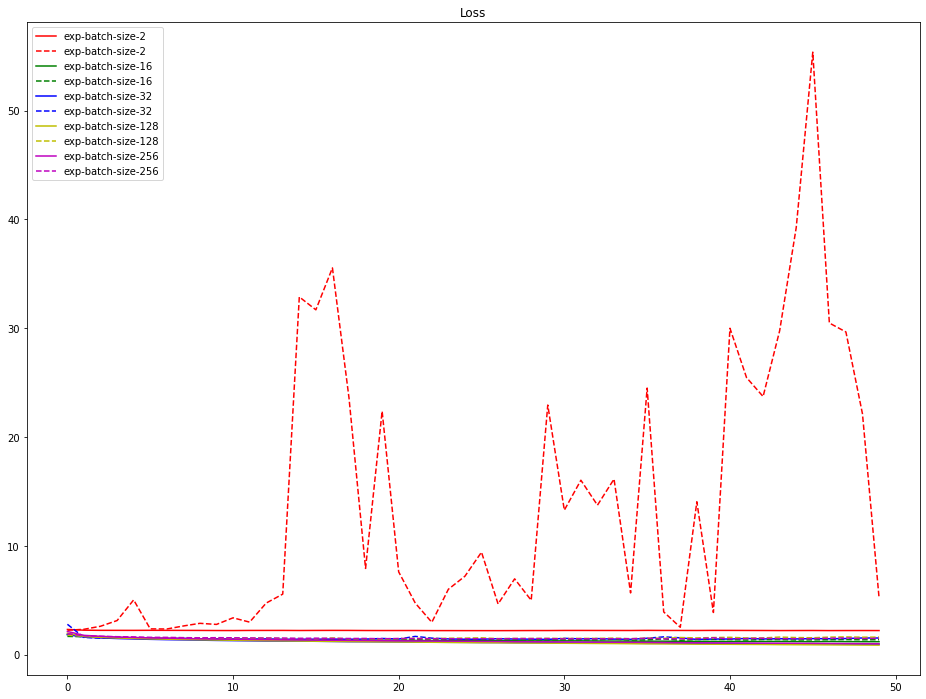

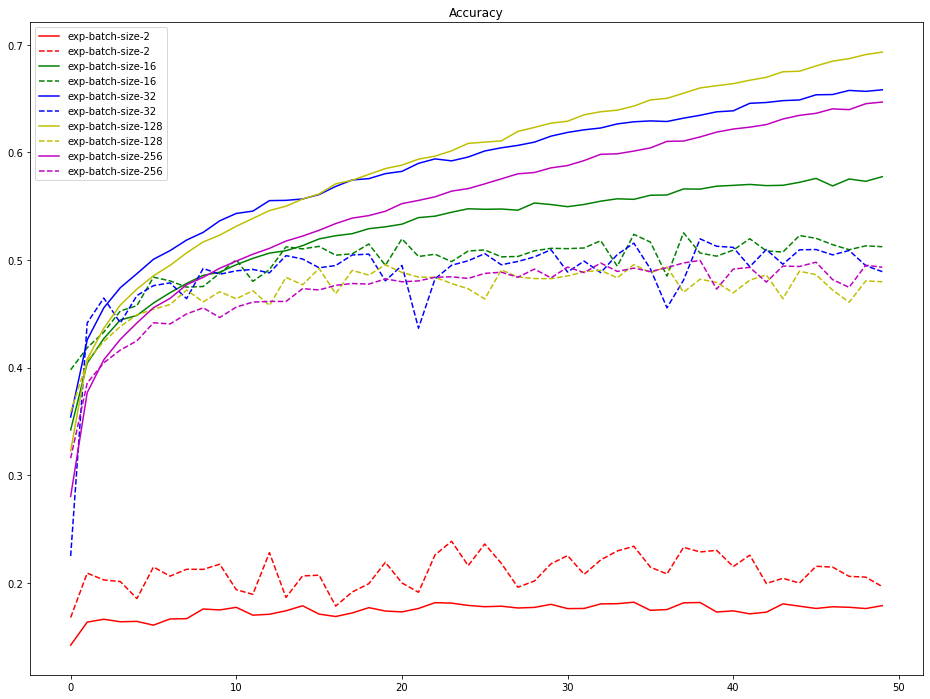

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "darkorange"]

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['loss'])),results[con]['loss'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_loss'])),results[con]['val_loss'], '--', label=con, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['accuracy'])),results[con]['accuracy'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_accuracy'])),results[con]['val_accuracy'], '--', label=con, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

#### 請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [0]:
BATCH_SIZE=[32,128,256]
EPOCHS=50
LEARNING_RATE=1e-2
MOMENTUM=0.95

In [0]:
def build_mlp2(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
        else:
            x = Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bn in BATCH_SIZE:
    keras.backend.clear_session()
    model=build_mlp2(x_train.shape[1:])
    opt=keras.optimizers.SGD(lr=LEARNING_RATE,momentum=MOMENTUM,nesterov=True)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
    
    
    model.fit(x_train,y_train,batch_size=bn,epochs=EPOCHS,
             validation_data=(x_test,y_test),shuffle=True)
    
    
    exp_name='exp-batch-size-%s' % str(bn)
    results[exp_name]=model.history.history

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 26s 521us/step - loss: 1.6701 - accuracy: 0.4033 - val_loss: 1.7856 - val_accuracy: 0.3696
Epoch 2/50
50000/50000 [==============================] - 26s 514us/step - loss: 1.4561 - accuracy: 0.4796 - val_loss: 1.5198 - val_accuracy: 0.4572
Epoch 3/50
50000/50000 [==============================] - 26s 515us/step - loss: 1.3536 - accuracy: 0.5162 - val_loss: 1.4810 - val_accuracy: 0.4697
Epoch 4/50
50000/50000 [==============================] - 26s 518us/step - loss: 1.2778 - accuracy: 0.5451 - val_loss: 1.4389 - val_accuracy: 0.4848
Epoch 5/50
50000/50000 [==============================] - 26s 521us/step - loss: 1.2123 - accuracy: 0.5673 - val_loss: 1.4847 - val_accuracy: 0.4681
Epoch 6/50
50000/50000 [==============================] - 26s 510us/step - loss: 1.1645 - accuracy: 0.5821 - val_loss: 1.4739 - val_accuracy: 0.4735
Epoch 7/50
50000/50000 [==============================] 

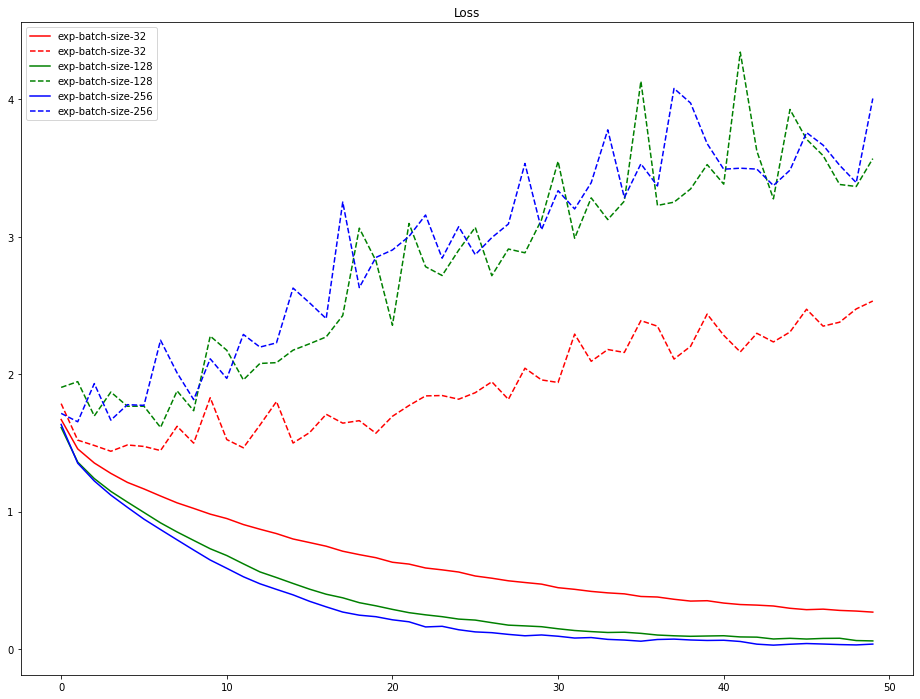

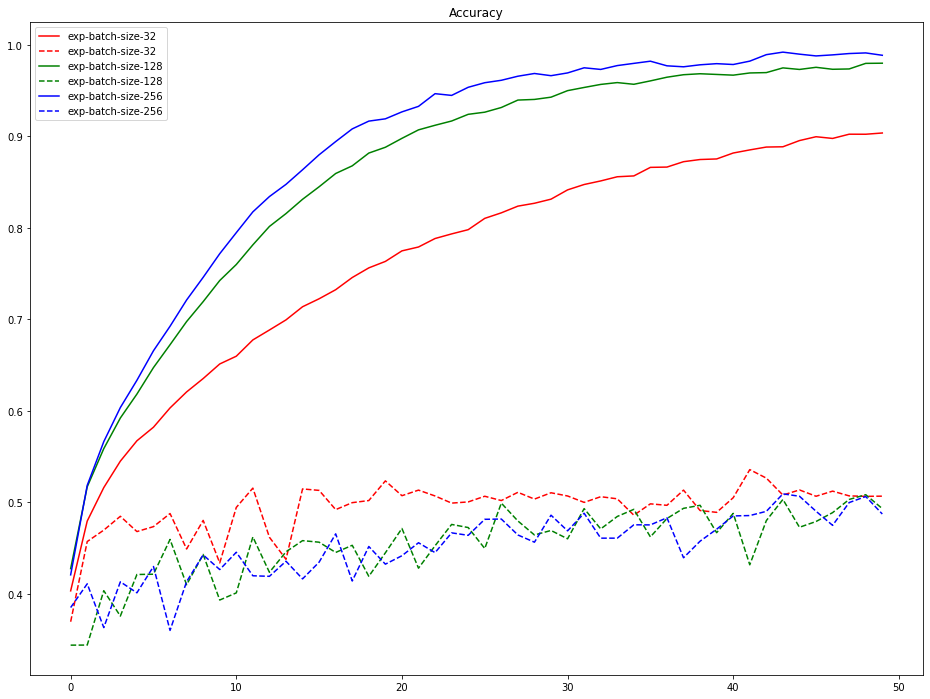

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "darkorange"]

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['loss'])),results[con]['loss'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_loss'])),results[con]['val_loss'], '--', label=con, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['accuracy'])),results[con]['accuracy'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_accuracy'])),results[con]['val_accuracy'], '--', label=con, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

#### 請於 BN 放在 Input Layer 後，並比較結果

In [0]:
def build_mlp3(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
        else:
            x = Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bn in BATCH_SIZE:
    keras.backend.clear_session()
    model=build_mlp3(x_train.shape[1:])
    opt=keras.optimizers.SGD(lr=LEARNING_RATE,momentum=MOMENTUM,nesterov=True)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
    
    
    model.fit(x_train,y_train,batch_size=bn,epochs=EPOCHS,
             validation_data=(x_test,y_test),shuffle=True)
    
    
    exp_name='exp-batch-size-%s' % str(bn)
    results[exp_name]=model.history.history

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 35s 707us/step - loss: 1.6657 - accuracy: 0.4061 - val_loss: 1.5053 - val_accuracy: 0.4609
Epoch 2/50
50000/50000 [==============================] - 35s 702us/step - loss: 1.4450 - accuracy: 0.4850 - val_loss: 1.3735 - val_accuracy: 0.5038
Epoch 3/50
50000/50000 [==============================] - 35s 700us/step - loss: 1.3507 - accuracy: 0.5166 - val_loss: 1.3330 - val_accuracy: 0.5236
Epoch 4/50
50000/50000 [==============================] - 35s 703us/step - loss: 1.2708 - accuracy: 0.5464 - val_loss: 1.3020 - val_accuracy: 0.5443
Epoch 5/50
50000/50000 [==============================] - 36s 718us/step - loss: 1.2166 - accuracy: 0.5644 - val_loss: 1.3007 - val_accuracy: 0.5418
Epoch 6/50
50000/50000 [==============================] - 35s 697us/step - loss: 1.1613 - accuracy: 0.5874 - val_loss: 1.2751 - val_accuracy: 0.5514
Epoch 7/50
50000/50000 [==============================] 

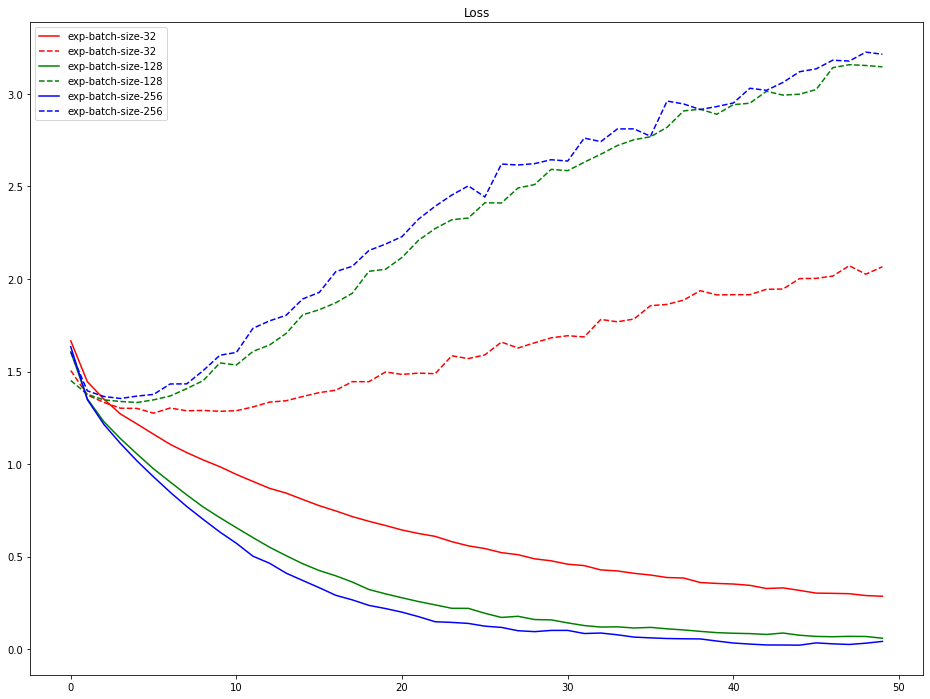

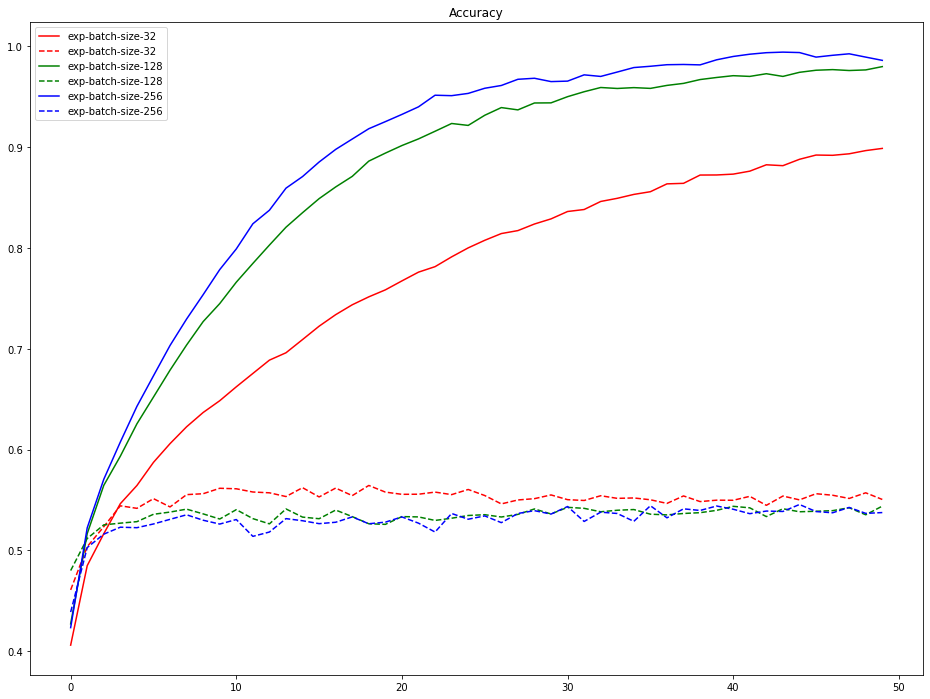

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "darkorange"]

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['loss'])),results[con]['loss'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_loss'])),results[con]['val_loss'], '--', label=con, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['accuracy'])),results[con]['accuracy'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_accuracy'])),results[con]['val_accuracy'], '--', label=con, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()